In [1]:
!pip install genaibook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
import torch
from diffusers import DDPMPipeline
from genaibook.core import get_device
# Set the device to use our GPU or CPU
device = get_device()
# Load the pipeline
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

  0%|          | 0/1000 [00:00<?, ?it/s]

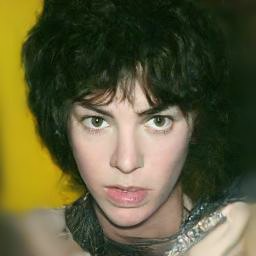

In [2]:
image_pipe().images[0]

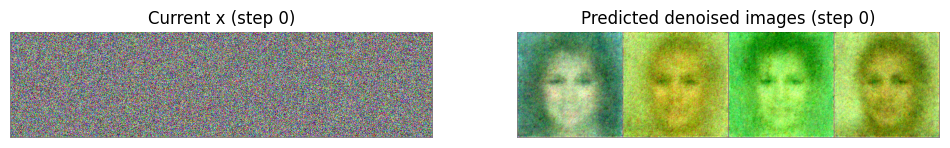

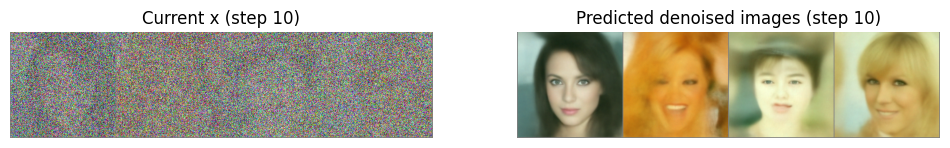

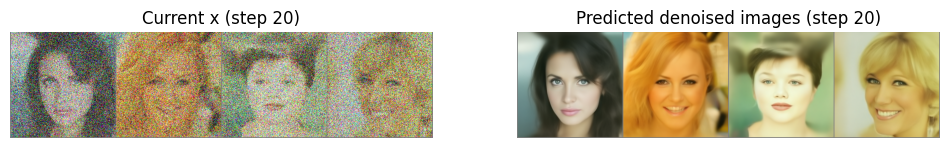

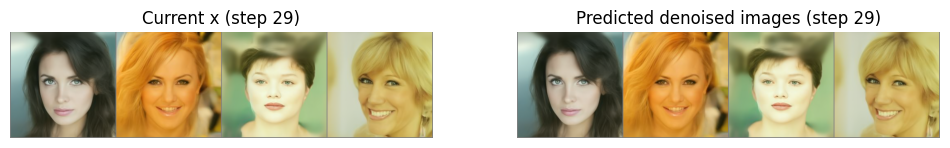

In [3]:
from genaibook.core import plot_noise_and_denoise

# The random starting point is a batch of 4 images
# Each image is 3-channel (RGB) 256x256 pixel image
image = torch.randn(4, 3, 256, 256).to(device)

# Set the specific number of diffusion steps
image_pipe.scheduler.set_timesteps(num_inference_steps=30)

# Loop through the sampling timesteps
for i, t in enumerate(image_pipe.scheduler.timesteps):
    # Get the prediction given the current sample x and the timestep t
    # As we're running inference, we don't need to calculate gradients,
    # so we can use torch.inference_mode().
    with torch.inference_mode():
        # We need to pass in the timestep t so that the model knows what
        # timestep it's currently at. We'll learn more about this in the
        # coming sections.
        noise_pred = image_pipe.unet(image, t)["sample"]

    # Calculate what the updated x should look like with the scheduler
    scheduler_output = image_pipe.scheduler.step(noise_pred, t, image)

    # Update x
    image = scheduler_output.prev_sample

    # Occasionally display both x and the predicted denoised images
    if i % 10 == 0 or i == len(image_pipe.scheduler.timesteps) - 1:
        plot_noise_and_denoise(scheduler_output, i)

In [4]:
!pip install --upgrade datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [1]:
from datasets import load_dataset

dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/609 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [2]:
from torchvision import transforms

# We keep this higher than in the book in this part for visualization
image_size = 384

# Define transformations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

In [3]:
from torch.utils.data import DataLoader
import torch

In [4]:
def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}


dataset.set_transform(transform)
batch_size = 16

train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)


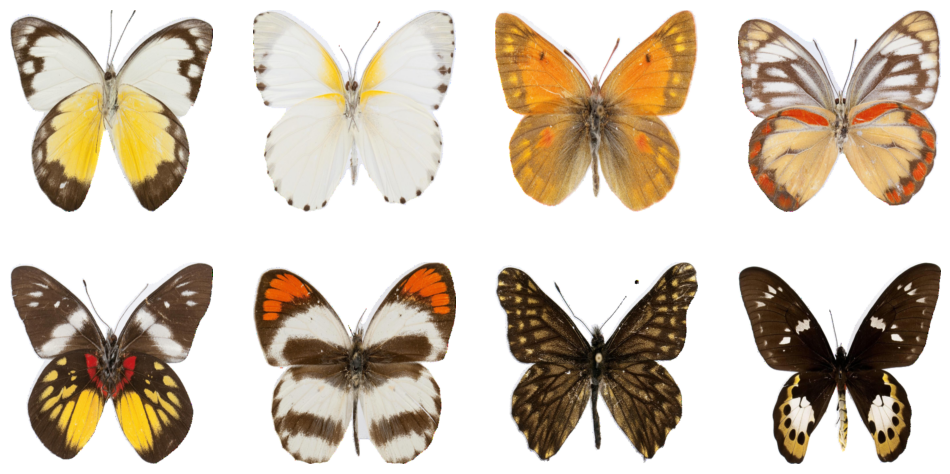

In [5]:

from genaibook.core import show_images

batch = next(iter(train_dataloader))

# When we normalized, we mapped (0, 1) to (-1, 1)
# Now we map back to (0, 1) for display
show_images(batch["images"][:8] * 0.5 + 0.5)

**Adding Noise**

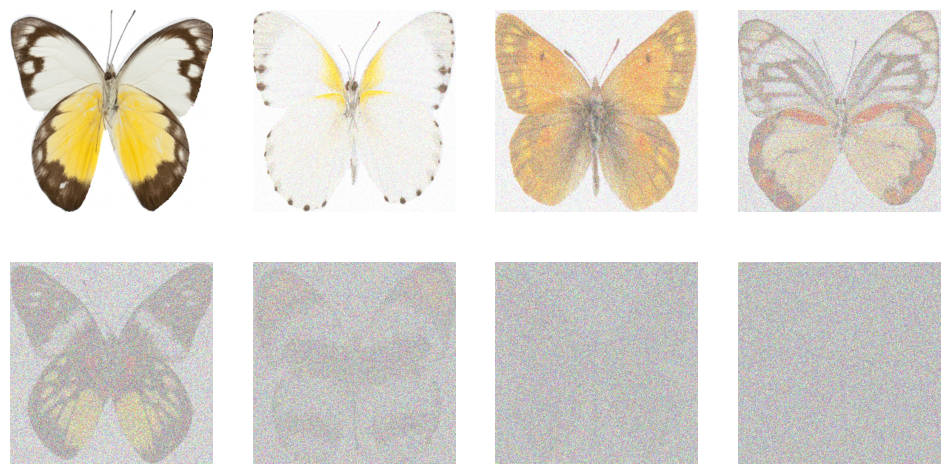

In [6]:
from diffusers import DDPMScheduler

# We'll learn about beta_start and beta_end in the next sections
scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)

# Create a tensor with 8 evenly spaced values
# from 0 to 999
timesteps = torch.linspace(0, 999, 8).long()

# We load 8 images from the dataset and
# add increasing amounts of noise to them
x = batch["images"][:8]
noise = torch.rand_like(x)
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))

**UNET**

In [9]:
from diffusers import UNet2DModel

model = UNet2DModel(
    in_channels=3,  # 3 channels for RGB images
    sample_size=64,  # Specify our input size
    # The number of channels per block affects the model size
    block_out_channels=(64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=("AttnUpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D"),
).to(device)

# Pass a batch of data through to make sure it works
with torch.inference_mode():
    out = model(noised_x.to(device), timestep=timesteps.to(device)).sample

print(noised_x.shape)
print(out.shape)

torch.Size([8, 3, 384, 384])
torch.Size([8, 3, 384, 384])


**Training**

In [10]:
from torchvision import transforms

batch_size = 32

def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}

# We reset to the initial size (64)
dataset.set_transform(transform)
image_size = 64

# Define data augmentations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

In [11]:

from torch.nn import functional as F

num_epochs = 50  # How many runs through the data should we do?
lr = 1e-4  # What learning rate should we use
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
losses = []  # Somewhere to store the loss values for later plotting

# Train the model (this takes a while)
for epoch in range(num_epochs):
    for batch in train_dataloader:
        # Load the input images
        clean_images = batch["images"].to(device)

        # Sample noise to add to the images
        noise = torch.randn(clean_images.shape).to(device)

        # Sample a random timestep for each image
        timesteps = torch.randint(
            0,
            scheduler.config.num_train_timesteps,
            (clean_images.shape[0],),
            device=device,
        ).long()

        # Add noise to the clean images according
        # to the noise magnitude at each timestep
        noisy_images = scheduler.add_noise(clean_images, noise, timesteps)

        # Get the model prediction for the noise
        # The model also uses the timestep as an input
        # for additional conditioning
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # Compare the prediction with the actual noise
        loss = F.mse_loss(noise_pred, noise)

        # Store the loss for later plotting
        losses.append(loss.item())

        # Update the model parameters with the optimizer based on this loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


    # Print out the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(
        f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}"
    )

Finished epoch 0. Average loss for this epoch: 0.400514
Finished epoch 1. Average loss for this epoch: 0.104373
Finished epoch 2. Average loss for this epoch: 0.086387
Finished epoch 3. Average loss for this epoch: 0.063777
Finished epoch 4. Average loss for this epoch: 0.056050
Finished epoch 5. Average loss for this epoch: 0.048088
Finished epoch 6. Average loss for this epoch: 0.048543
Finished epoch 7. Average loss for this epoch: 0.042810
Finished epoch 8. Average loss for this epoch: 0.034710
Finished epoch 9. Average loss for this epoch: 0.038193
Finished epoch 10. Average loss for this epoch: 0.036109
Finished epoch 11. Average loss for this epoch: 0.033406
Finished epoch 12. Average loss for this epoch: 0.028501
Finished epoch 13. Average loss for this epoch: 0.028351
Finished epoch 14. Average loss for this epoch: 0.029510
Finished epoch 15. Average loss for this epoch: 0.027797
Finished epoch 16. Average loss for this epoch: 0.023383
Finished epoch 17. Average loss for this 

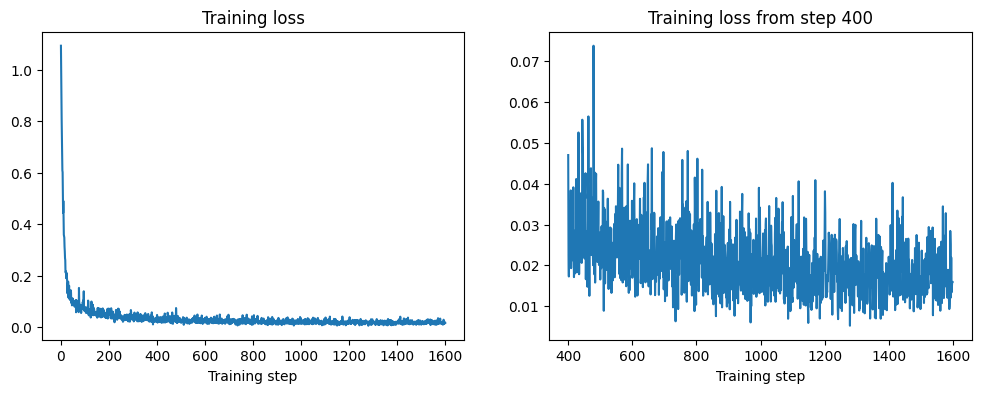

In [12]:
from matplotlib import pyplot as plt

plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training loss")
plt.xlabel("Training step")

plt.subplot(1, 2, 2)
plt.plot(range(400, len(losses)), losses[400:])
plt.title("Training loss from step 400")
plt.xlabel("Training step");

  0%|          | 0/1000 [00:00<?, ?it/s]

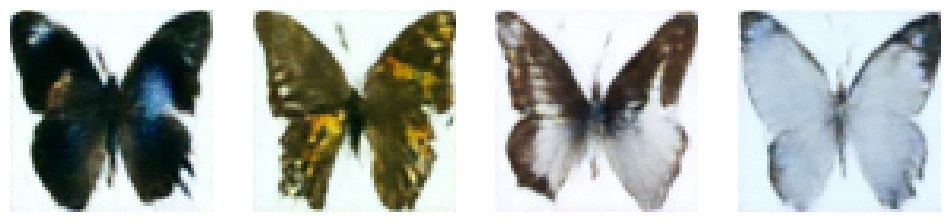

In [13]:
pipeline = DDPMPipeline(unet=model, scheduler=scheduler)
ims = pipeline(batch_size=4).images
show_images(ims, nrows=1)


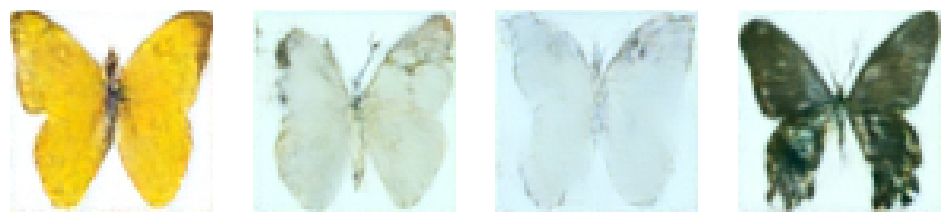

In [14]:
# Random starting point (4 random images):
sample = torch.randn(4, 3, 64, 64).to(device)

for t in scheduler.timesteps:
    # Get the model prediction
    with torch.inference_mode():
        noise_pred = model(sample, t)["sample"]

    # Update sample with step
    sample = scheduler.step(noise_pred, t, sample).prev_sample

show_images(sample.clip(-1, 1) * 0.5 + 0.5, nrows=1)

**In Depth: Noise Schedules**

In [15]:
x = next(iter(train_dataloader))["images"][:8]
noise = torch.rand_like(x)

In [16]:

def corrupt(x, noise, amount):
    # Reshape amount so it works correctly with the original data
    amount = amount.view(-1, 1, 1, 1)  # make sure it's broadcastable

    # Blend the original data and noise based on the amount
    return (
        x * (1 - amount) + noise * amount
    )  # equivalent to x.lerp(noise, amount)

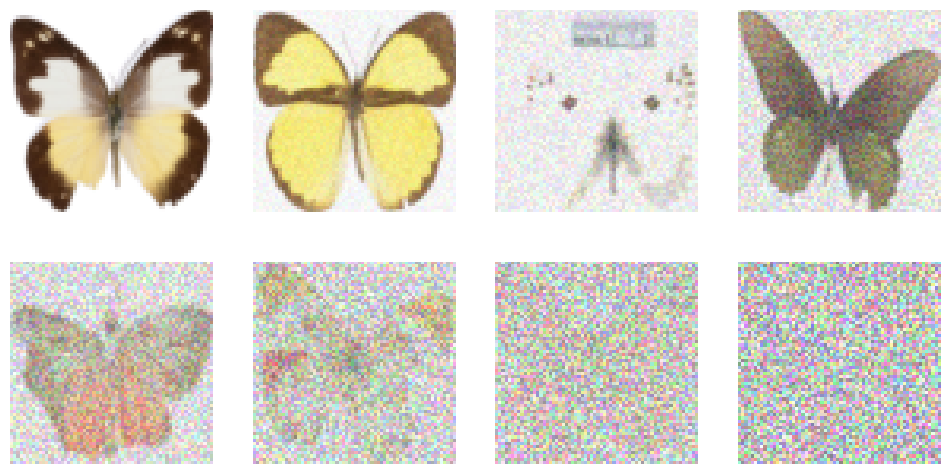

In [17]:
amount = torch.linspace(0, 1, 8)
noised_x = corrupt(x, noise, amount)
show_images(noised_x * 0.5 + 0.5)

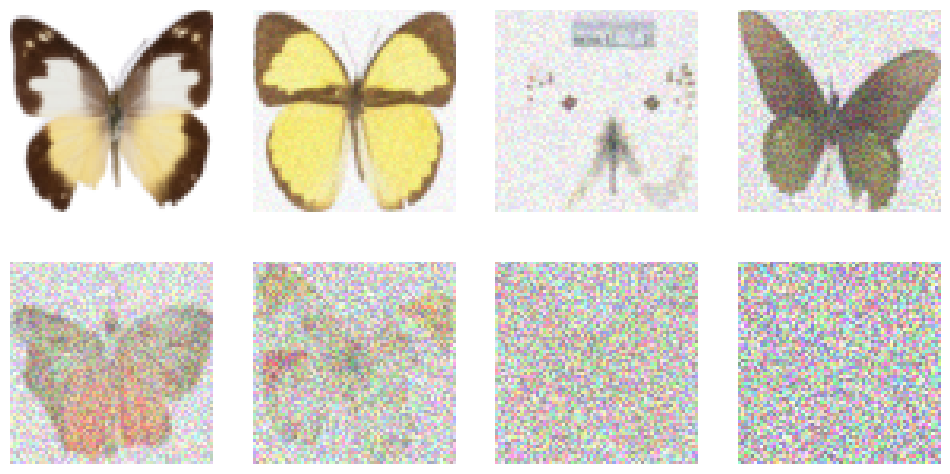

In [18]:
class SimpleScheduler:
    def __init__(self):
        self.num_train_timesteps = 1000

    def add_noise(self, x, noise, timesteps):
        amount = timesteps / self.num_train_timesteps
        return corrupt(x, noise, amount)


scheduler = SimpleScheduler()
timesteps = torch.linspace(0, 999, 8).long()
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images(noised_x * 0.5 + 0.5)


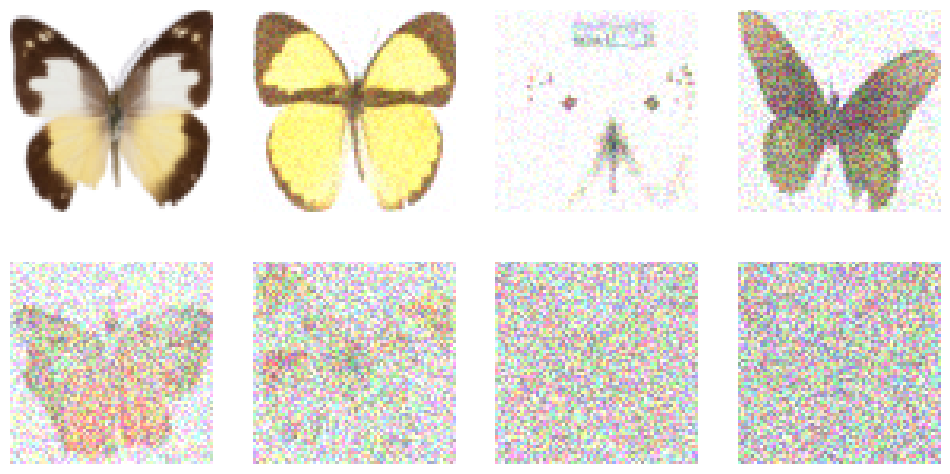

In [19]:

scheduler = DDPMScheduler(beta_end=0.01)
timesteps = torch.linspace(0, 999, 8).long()
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))

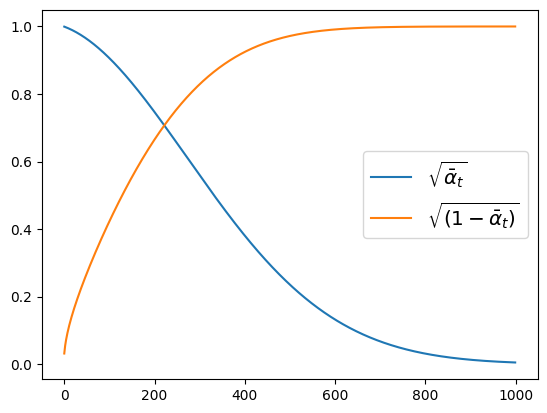

In [20]:

from genaibook.core import plot_scheduler

plot_scheduler(
    DDPMScheduler(beta_start=0.001, beta_end=0.02, beta_schedule="linear")
)


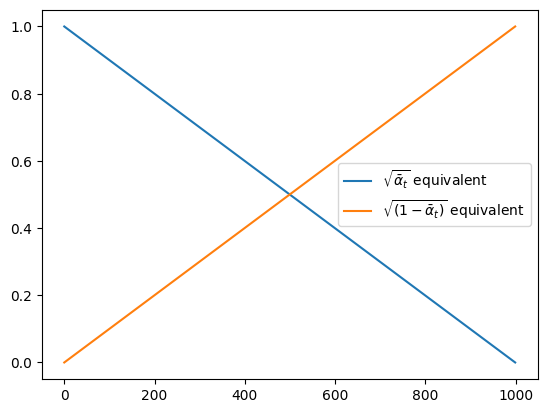

In [21]:

plot_scheduler(SimpleScheduler())

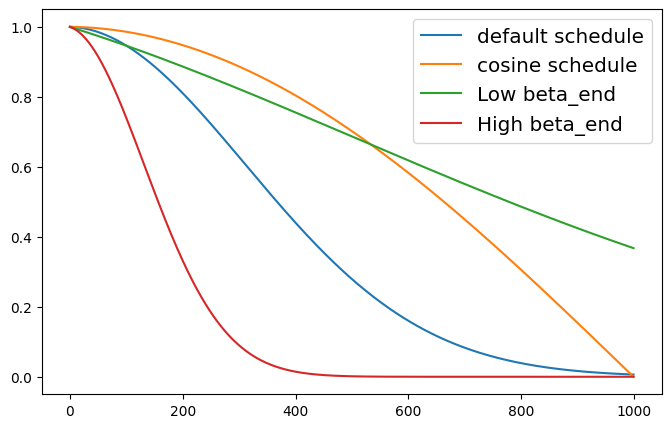

In [22]:
fig, (ax) = plt.subplots(1, 1, figsize=(8, 5))
plot_scheduler(
    DDPMScheduler(beta_schedule="linear"),
    label="default schedule",
    ax=ax,
    plot_both=False,
)
plot_scheduler(
    DDPMScheduler(beta_schedule="squaredcos_cap_v2"),
    label="cosine schedule",
    ax=ax,
    plot_both=False,
)
plot_scheduler(
    DDPMScheduler(beta_start=0.001, beta_end=0.003, beta_schedule="linear"),
    label="Low beta_end",
    ax=ax,
    plot_both=False,
)
plot_scheduler(
    DDPMScheduler(beta_start=0.001, beta_end=0.1, beta_schedule="linear"),
    label="High beta_end",
    ax=ax,
    plot_both=False,
)

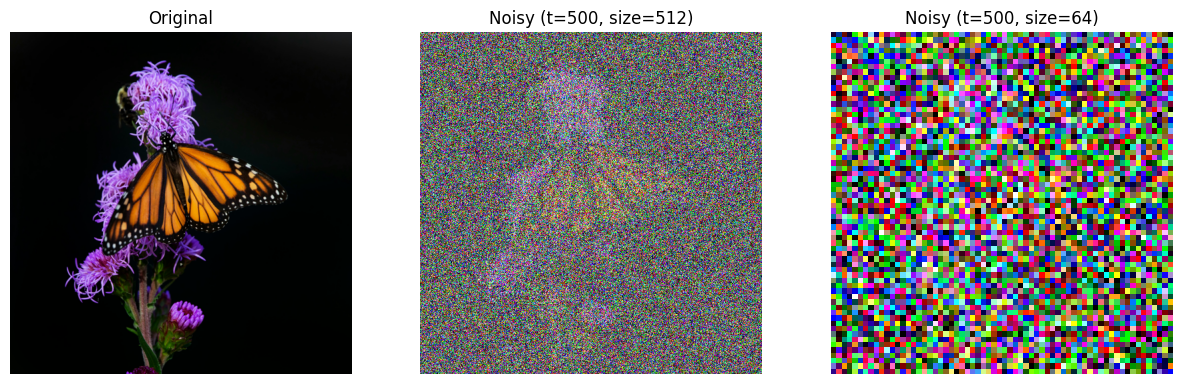

In [23]:
from genaibook.core import load_image

scheduler = DDPMScheduler(beta_end=0.05, beta_schedule="scaled_linear")
image = load_image(
    "https://images.pexels.com/photos/15403949/pexels-photo-15403949.jpeg",
    size=((512, 512)),
    return_tensor=True,
)
small_image = transforms.functional.resize(image, 64, antialias=True)
t = torch.tensor(500)  # The timestep we're noising to
show_images(
    [
        image,
        scheduler.add_noise(image * 2 - 1, torch.randn_like(image), t).clip(
            -1, 1
        )
        * 0.5
        + 0.5,
        scheduler.add_noise(
            small_image * 2 - 1, torch.randn_like(small_image), t
        ).clip(-1, 1)
        * 0.5
        + 0.5,
    ],
    titles=["Original", "Noisy (t=500, size=512)", "Noisy (t=500, size=64)"],
    figsize=(15, 5),
)

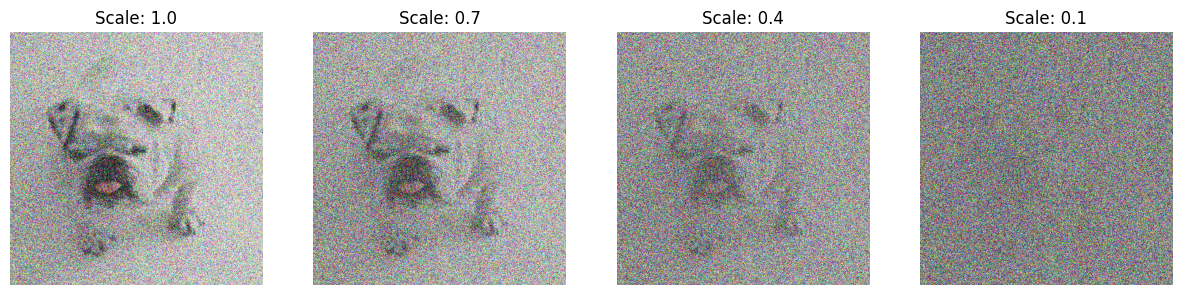

In [24]:
import numpy as np
from genaibook.core import SampleURL

scheduler = DDPMScheduler(beta_end=0.05, beta_schedule="scaled_linear")
image = load_image(
    SampleURL.DogExample,
    size=((512, 512)),
    return_tensor=True,
)

t = torch.tensor(300)  # The timestep we're noising to
scales = np.linspace(0.1, 1.0, 4)

images = [image]
noise = torch.randn_like(image)
for b in reversed(scales):
    noised = (
        scheduler.add_noise(b * (image * 2 - 1), noise, t).clip(-1, 1) * 0.5
        + 0.5
    )
    images.append(noised)

show_images(
    images[1:],
    nrows=1,
    titles=[f"Scale: {b}" for b in reversed(scales)],
    figsize=(15, 5),
)

# **In Depth: UNets and Alternatives**

In [25]:
from torch import nn


class BasicUNet(nn.Module):
    """A minimal UNet implementation."""

    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        self.down_layers = nn.ModuleList(
            [
                nn.Conv2d(in_channels, 32, kernel_size=5, padding=2),
                nn.Conv2d(32, 64, kernel_size=5, padding=2),
                nn.Conv2d(64, 64, kernel_size=5, padding=2),
            ]
        )
        self.up_layers = nn.ModuleList(
            [
                nn.Conv2d(64, 64, kernel_size=5, padding=2),
                nn.Conv2d(64, 32, kernel_size=5, padding=2),
                nn.Conv2d(32, out_channels, kernel_size=5, padding=2),
            ]
        )

        # Use the SiLU activation function, which has been shown to work well
        # due to different properties (smoothness, non-monotonicity, etc.).
        self.act = nn.SiLU()
        self.downscale = nn.MaxPool2d(2)
        self.upscale = nn.Upsample(scale_factor=2)

    def forward(self, x):
        h = []
        for i, l in enumerate(self.down_layers):
            x = self.act(l(x))
            if i < 2:  # For all but the third (final) down layer:
                h.append(x)  # Storing output for skip connection
                x = self.downscale(x)  # Downscale ready for the next layer

        for i, l in enumerate(self.up_layers):
            if i > 0:  # For all except the first up layer
                x = self.upscale(x)  # Upscale
                x += h.pop()  # Fetching stored output (skip connection)
            x = self.act(l(x))

        return x

In [26]:
from datasets import load_dataset

dataset = load_dataset("mnist")

README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [27]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

image_size = 32
batch_size = 8


def transform(examples):
    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}


dataset.set_transform(transform)

# Define data augmentations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.ToTensor(),  # Convert to tensor (0, 1)
    ]
)

train_dataloader = torch.utils.data.DataLoader(
    dataset["train"], batch_size=batch_size, shuffle=True
)

Input shape: torch.Size([8, 1, 32, 32])


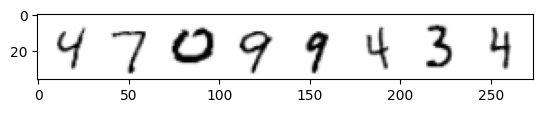

In [28]:
import torchvision
from matplotlib import pyplot as plt

imgs = next(iter(train_dataloader))["images"]
print("Input shape:", imgs.shape)
plt.imshow(torchvision.utils.make_grid(imgs)[0], cmap="Greys");

In [29]:

def corrupt(x, noise, amount):
    amount = amount.view(-1, 1, 1, 1)  # make sure it's broadcastable
    return (
        x * (1 - amount) + noise * amount
    )  # equivalent to x.lerp(noise, amount)

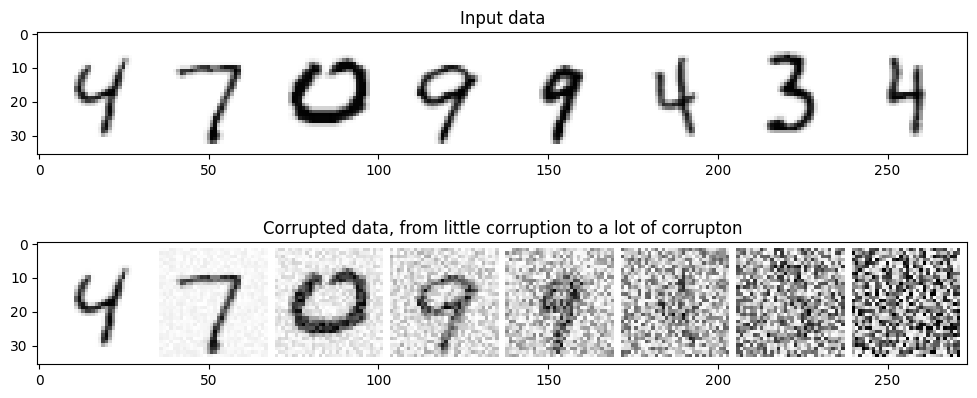

In [30]:
# Plotting the input data
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].set_title("Input data")
axs[0].imshow(torchvision.utils.make_grid(imgs)[0], cmap="Greys")

# Adding noise (we go from little corruption to a lot)
amount = torch.linspace(0, 1, imgs.shape[0])
noise = torch.rand_like(imgs)
noised_x = corrupt(imgs, noise, amount)

# Plotting the noised version
axs[1].set_title("Corrupted data, from little corruption to a lot of corrupton")
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap="Greys")

In [33]:

net = BasicUNet()
x = torch.rand(8, 1, 32, 32)
net(x).shape


torch.Size([8, 1, 32, 32])

In [34]:
from torch.nn import functional as F

device = get_device()
num_epochs = 5  # How many runs through the data should we do?
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(
    dataset["train"], batch_size=batch_size, shuffle=True
)

model = BasicUNet().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
losses = []  # Somewhere to store the loss values for later plotting

# Train the model
for epoch in range(num_epochs):
    for batch in train_dataloader:
        # Load the input images
        clean_images = batch["images"].to(device)

        # Sample noise to add to the images
        noise = torch.rand_like(clean_images).to(device)

        # Sample amount of noise to add to the images
        # In the chapter, we use the noise scheduler to manage this
        # as we can pass the timestep. Here, we keep it simple and
        # just sample a random amount of noise to add to the images.
        noise_amount = torch.randn(clean_images.shape[0]).to(device)

        # Add noise to the clean images according to the noise magnitude
        noisy_x = corrupt(clean_images, noise, noise_amount)

        # Get the model prediction
        pred = model(noisy_x)
        # Compare the prediction with the actual image
        # Big note: in the book, we optimize the model to reduce difference
        # the generation and the noise, so the model learns to predict the noise.
        # Here, we calculate the loss between the image and the generation, so the
        # model learns to generate the images directly.
        loss = F.mse_loss(pred, clean_images)

        # Update the model parameters with the optimizer based on this loss
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Store the loss for later plotting
        losses.append(loss.item())

    # Print our the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(
        f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}"
    )


Finished epoch 0. Average loss for this epoch: 0.017005
Finished epoch 1. Average loss for this epoch: 0.010541
Finished epoch 2. Average loss for this epoch: 0.009693
Finished epoch 3. Average loss for this epoch: 0.008945
Finished epoch 4. Average loss for this epoch: 0.008778


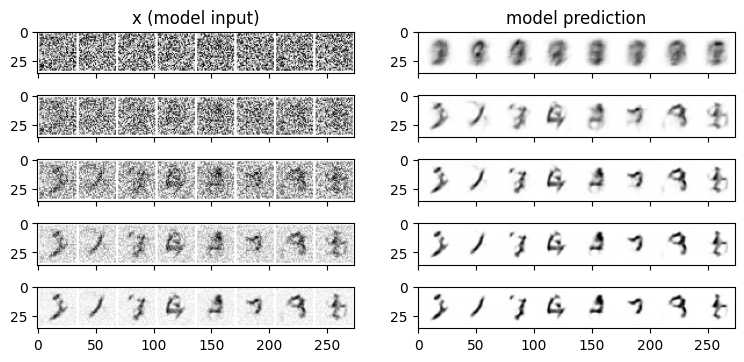

In [35]:

n_steps = 5
x = torch.rand(8, 1, 32, 32).to(device)  # Start from random
step_history = [x.detach().cpu()]
pred_output_history = []

for i in range(n_steps):
    # Predict denoise image
    with torch.no_grad():
        pred = model(x)

    # Store output for plotting
    pred_output_history.append(pred.detach().cpu())

    # Move slightly towards that direction
    mix_factor = 1 / (n_steps - i)
    x = x * (1 - mix_factor) + pred * mix_factor

    # Store output for plotting
    step_history.append(x.detach().cpu())

fig, axs = plt.subplots(n_steps, 2, figsize=(9, 4), sharex=True)
axs[0, 0].set_title("x (model input)")
axs[0, 1].set_title("model prediction")
for i in range(n_steps):
    axs[i, 0].imshow(
        torchvision.utils.make_grid(step_history[i])[0].clip(0, 1), cmap="Greys"
    )
    axs[i, 1].imshow(
        torchvision.utils.make_grid(pred_output_history[i])[0].clip(0, 1),
        cmap="Greys",
    )

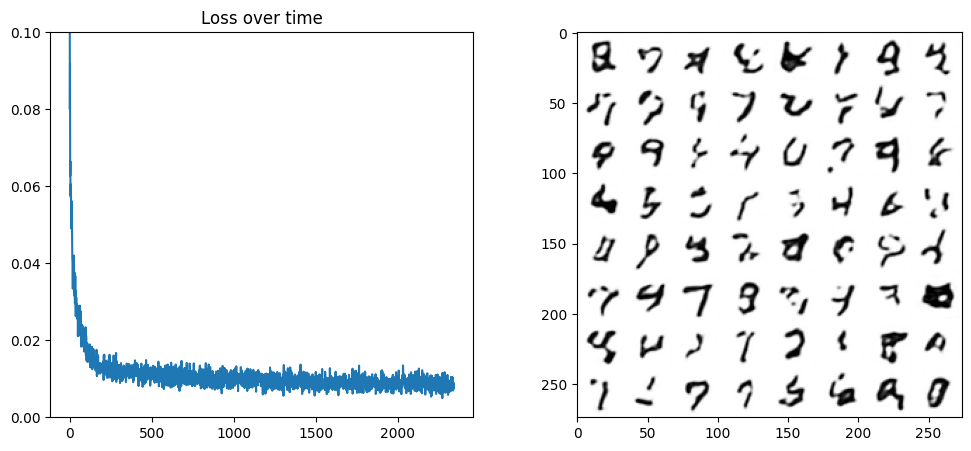

In [36]:

import torchvision
from matplotlib import pyplot as plt

# Plot losses and some samples
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Losses
axs[0].plot(losses)
axs[0].set_ylim(0, 0.1)
axs[0].set_title("Loss over time")

# Samples
n_steps = 40
x = torch.rand(64, 1, 32, 32).to(device)
for i in range(n_steps):
    noise_amount = torch.ones((x.shape[0],)).to(device) * (
        1 - (i / n_steps)
    )  # Starting high going low
    with torch.no_grad():
        pred = model(x)
    mix_factor = 1 / (n_steps - i)
    x = x * (1 - mix_factor) + pred * mix_factor
axs[1].imshow(
    torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1),
    cmap="Greys",
)

In [37]:

basic_losses = losses
basic_model = model

In [38]:
from diffusers import UNet2DModel

model = UNet2DModel(
    sample_size=32,
    in_channels=1,
    out_channels=1,
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(32, 64, 64),  # Roughly matching our basic unet example
    down_block_types=(
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
    ),
).to(device)


In [39]:


sum(
    [p.numel() for p in model.parameters()]
)  # 1.7M vs the ~309k parameters of the BasicUNet

1707009

In [40]:
batch_size = 128
train_dataloader = DataLoader(
    dataset["train"], batch_size=batch_size, shuffle=True
)
num_epochs = 5

train_dataloader = torch.utils.data.DataLoader(
    dataset["train"], batch_size=batch_size, shuffle=True
)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)
losses = []  # Somewhere to store the loss values for later plotting

# Train the model
for epoch in range(num_epochs):
    for batch in train_dataloader:
        # Load the input images
        clean_images = batch["images"].to(device)

        # Sample noise to add to the images
        noise = torch.rand_like(clean_images).to(device)

        # Sample amount of noise to add to the images
        noise_amount = torch.randn(clean_images.shape[0]).to(device)

        # Add noise to the clean images according to the noise magnitude
        noisy_x = corrupt(clean_images, noise, noise_amount)

        # Get the model prediction using timestep 0
        pred = model(noisy_x, 0).sample

        # Compare the prediction with the actual image
        # Big note: in the book, we optimize the model to reduce difference
        # the generation and the noise, so the model learns to predict the noise.
        # Here, we calculate the loss between the image and the generation, so the
        # model learns to generate the images directly.
        loss = F.mse_loss(pred, clean_images)

        # Update the model parameters with the optimizer based on this loss
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Store the loss for later plotting
        losses.append(loss.item())

    # Print our the average of the loss values for this epoch:
    avg_loss = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
    print(
        f"Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}"
    )

Finished epoch 0. Average loss for this epoch: 0.011633
Finished epoch 1. Average loss for this epoch: 0.006850
Finished epoch 2. Average loss for this epoch: 0.006161
Finished epoch 3. Average loss for this epoch: 0.005688
Finished epoch 4. Average loss for this epoch: 0.005309


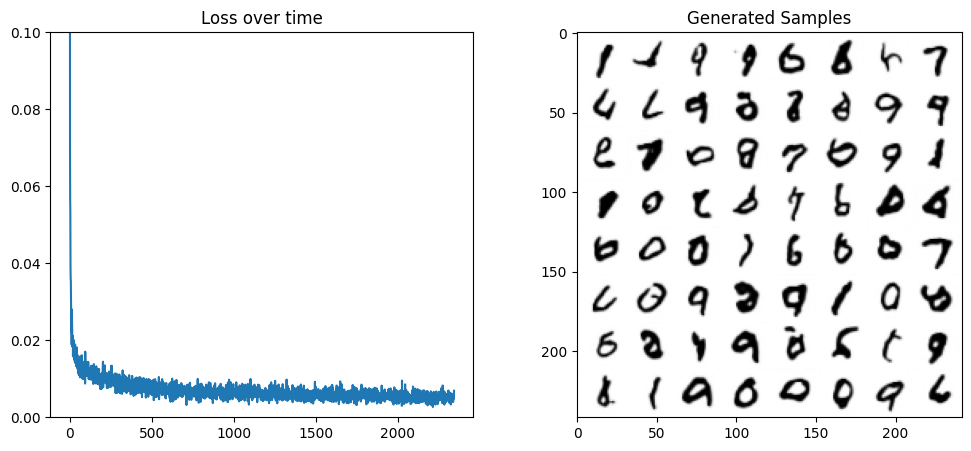

In [41]:
# Plot losses and some samples
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Losses
axs[0].plot(losses)
axs[0].set_ylim(0, 0.1)
axs[0].set_title("Loss over time")

# Samples
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
    noise_amount = torch.ones((x.shape[0],)).to(device) * (
        1 - (i / n_steps)
    )  # Starting high going low
    with torch.no_grad():
        pred = model(x, 0).sample
    mix_factor = 1 / (n_steps - i)
    x = x * (1 - mix_factor) + pred * mix_factor

axs[1].imshow(
    torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1),
    cmap="Greys",
)
axs[1].set_title("Generated Samples");


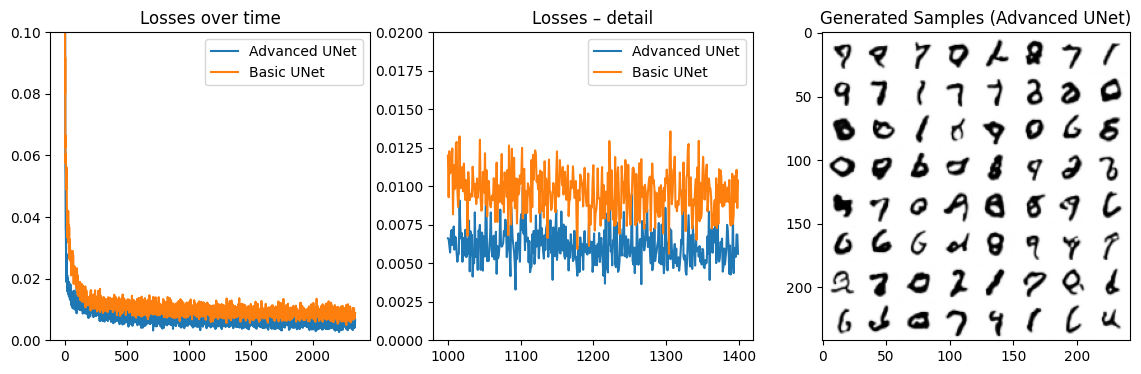

In [42]:
# Plot losses and some samples
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
import numpy as np

# Losses
axs[0].plot(losses, label="Advanced UNet")
axs[0].plot(basic_losses, label="Basic UNet")
axs[0].set_ylim(0, 0.1)
axs[0].set_title("Losses over time")
axs[0].legend()

# Losses
axs[1].plot(losses[1000:1400], label="Advanced UNet")
axs[1].plot(basic_losses[1000:1400], label="Basic UNet")
axs[1].set_ylim(0, 0.02)
axs[1].set_title("Losses – detail")
axs[1].set_xticks(np.arange(0, 401, step=100), np.arange(1000, 1401, step=100))
axs[1].legend()

# Samples
n_steps = 40
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
    noise_amount = torch.ones((x.shape[0],)).to(device) * (
        1 - (i / n_steps)
    )  # Starting high going low
    with torch.no_grad():
        pred = model(x, 0).sample
    mix_factor = 1 / (n_steps - i)
    x = x * (1 - mix_factor) + pred * mix_factor

axs[2].imshow(
    torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1),
    cmap="Greys",
)
axs[2].set_title("Generated Samples (Advanced UNet)");

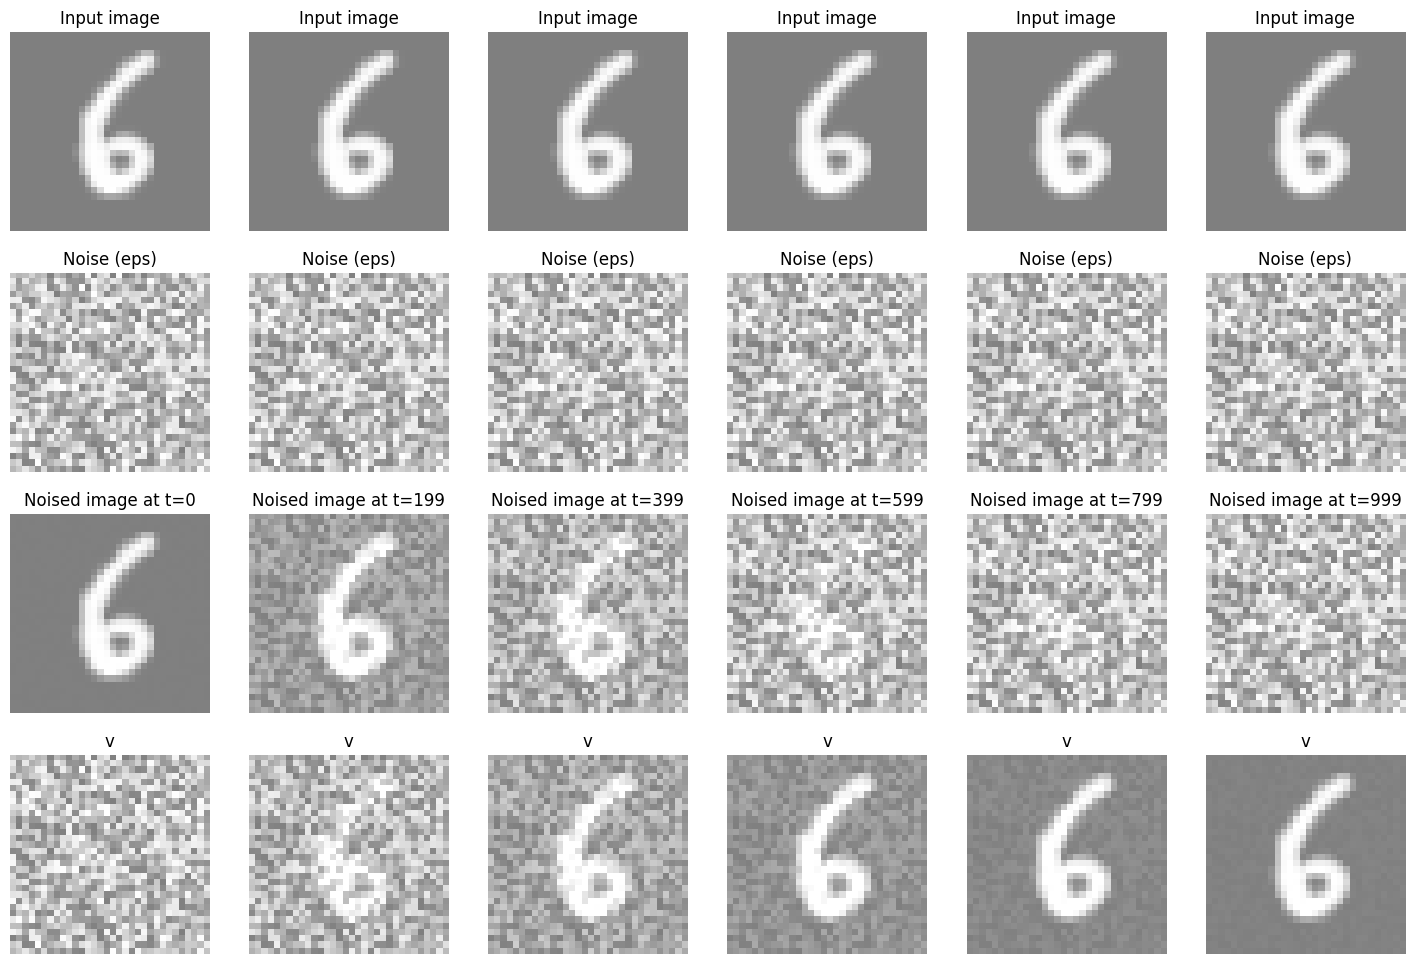

In [43]:
# Updated for large image sizes
scheduler = DDPMScheduler(beta_end=0.012)
sample = batch["images"][0]
image_size = sample.shape[-1]
noise_size = image_size  # 32
res_transform = transforms.Resize(noise_size, antialias=True)
x = res_transform(sample.expand(6, 3, image_size, image_size))
noise = torch.rand_like(res_transform(sample)).expand(
    6, 3, noise_size, noise_size
)
timesteps = torch.linspace(0, 999, 6).long()
noised_x = scheduler.add_noise(x, noise, timesteps)
alpha_bars = scheduler.alphas_cumprod[timesteps]
v = (
    alpha_bars.view(-1, 1, 1, 1).sqrt() * noise
    + (1 - alpha_bars.view(-1, 1, 1, 1)).sqrt() * x
)
images = torch.cat(
    [
        x,
        noise,
        noised_x,
        v,
    ],
    dim=0,
)
titles = (
    ["Input image"] * 6
    + ["Noise (eps)"] * 6
    + [f"Noised image at t={t}" for t in timesteps]
    + ["v"] * 6
)

show_images(images.clip(-1, 1) * 0.5 + 0.5, ncols=6, titles=titles)